In [1]:
import os
import numpy as np
np.random.seed(420)
from IPython.display import HTML

from HMM import unsupervised_HMM, from_hmm
from HMM_helper import (
    parse_seqs,
    parse_text,
    update_syll_map,
    sample_sentence,
    visualize_sparsities,
    rhyme_dict_gen
)

In [2]:
with open(os.path.join(os.getcwd(), 'data/shakespeare.txt'), 'r') as f:
    text = f.read()

with open(os.path.join(os.getcwd(), 'data/Syllable_dictionary.txt'), 'r') as f:
    syll_map0 = {}
    for i, line in enumerate(f):
        line = line.strip().split()
        word = line[0] 
        # Add 10 to denote end of line syll_count
        sylls = np.array([int(s.replace('E', '1')) for s in line[1:]])
        assert(word not in syll_map0)
        syll_map0[word] = sylls

In [5]:
seqs = parse_text(text, by='line')
obs, obs_map = parse_seqs(seqs)
syll_map = update_syll_map(syll_map0, obs_map)
rhyme_d = rhyme_dict_gen(text, connected=True, with_words=False)

In [7]:
hmm8 = unsupervised_HMM(obs, 10, 5)

100%|██████████| 5/5 [00:16<00:00,  3.20s/it]


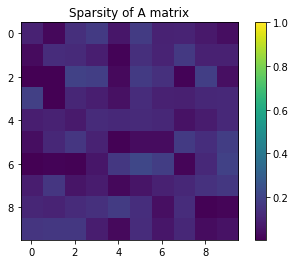

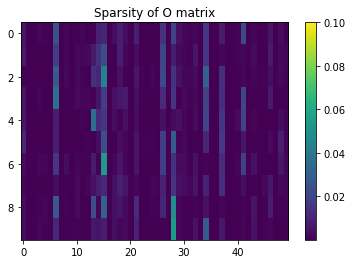

In [8]:
visualize_sparsities(hmm8, O_max_cols=50)

In [9]:
print('Sample Sentence:\n====================')
print(sample_sentence(hmm8, obs_map, n_words=25))

Sample Sentence:
Who his away the note the and but despite pace when prime me the then do your earth time if if i bide one present...


In [10]:
shmm = from_hmm(hmm8, syll_map, obs_map)
print(shmm.generate_sonnet())

Have still and before full the and nature,
And gentle ah of is living thy rhyme,
In enough hawks in me sorrows this love,
Touches of not brow outbraves and mourn how,
Fiery best and thou some crave can allayed,
Rough most not frantic-mad with of where for,
Was among these of toward how in own men,
Praise their although art proving but sweet is,
Poor to gain but loves hardest worse angel,
Deeds me it boast praised gay send'st muse it the,
I self back rage so bring eye which thoughts fair,
Which works was grace touches will freezings love,
Strong beauteous by heart heart wasteful so lines,
Doth your all would thy the i hide their head,
